In [1]:
from dd_class import Elevage
from dd_class import Dragodinde
import random
import time 

class Random_crossing :
    def __init__(self) :
        self.elevage = self.create_elevage()

    def __str__(self) :
        return (f"{self.elevage}")
    
    def get_length_elevage(self) :
        return len(self.elevage.get_dragodindes())
    
    def get_better_generation(self) :
        better_generation = 1
        for dragodinde in self.elevage.get_dragodindes() :
            generation = dragodinde.get_generation()
            if generation > better_generation :
                better_generation = generation
        
        return better_generation

    def get_dd_better_generation(self, dragodindes) :
        better_generation = 1
        index_best_dd = 0
        for idx, dragodinde in enumerate(dragodindes) :
            generation  = dragodinde.get_generation()
            if generation > better_generation :
                better_generation = generation
                index_best_dd = idx
        return dragodindes[index_best_dd]

    def create_elevage(self):

        dragodindes_data = [
            (1, "M", "Rousse", 1),
            (2, "F", "Rousse", 1),
            (3, "M", "Amande", 1),
            (4, "F", "Amande", 1),
            (5, "M", "Dorée", 1),
            (6, "F", "Dorée", 1)
        ]

        list_dd = []
        for id, gender, color, generation in dragodindes_data:
            dragodinde = Dragodinde(id, gender, color, generation)
            list_dd.append(dragodinde)

        return Elevage(list_dd)
    
    def random_crosing_better_gen(self):
        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]

        if not males or not females:
            raise ValueError("No suitable pairs for crossing.")

        # Take the best generation
        male = self.get_dd_better_generation(males)
        female = self.get_dd_better_generation(females)

        if male.get_generation() != female.get_generation():
            male = random.choice(males)
            female = random.choice(females)
        
        while male.get_couleur() == female.get_couleur() :
            male = random.choice(males)
            female = random.choice(females)

        # Assuming accouplement_naissance is a method that performs crossing and returns probabilities
        nouvelle_dd, _ = self.elevage.accouplement_naissance(male, female)

        return nouvelle_dd.get_generation()

    def random_crosing(self):
        males = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "M"]
        females = [dd for dd in self.elevage.get_dragodindes() if dd.get_sex() == "F"]

        if not males or not females:
            raise ValueError("No suitable pairs for crossing.")

        male = random.choice(males)
        female = random.choice(females)

        # Assuming accouplement_naissance is a method that performs crossing and returns probabilities
        nouvelle_dd, _ = self.elevage.accouplement_naissance(male, female)

        return nouvelle_dd.get_generation()

In [2]:
list_simulation_random = []
for i in range(100) :
    elevage = Random_crossing()
    list_gen_upgrade_random = [1]
    better_generation = 1
    crosing_number = 1000
    for i in range(crosing_number) :
        generation = elevage.random_crosing()
        if generation > better_generation :
            better_generation = generation
        list_gen_upgrade_random.append(better_generation)
    list_simulation_random.append(list_gen_upgrade_random)

In [3]:
list_simulation_random_better = []
for i in range(100) :
    elevage = Random_crossing()
    list_gen_upgrade_random = [1]
    better_generation = 1
    crosing_number = 1000
    for i in range(crosing_number) :
        generation = elevage.random_crosing_better_gen()
        if generation > better_generation :
            better_generation = generation
        list_gen_upgrade_random.append(better_generation)
    list_simulation_random_better.append(list_gen_upgrade_random)

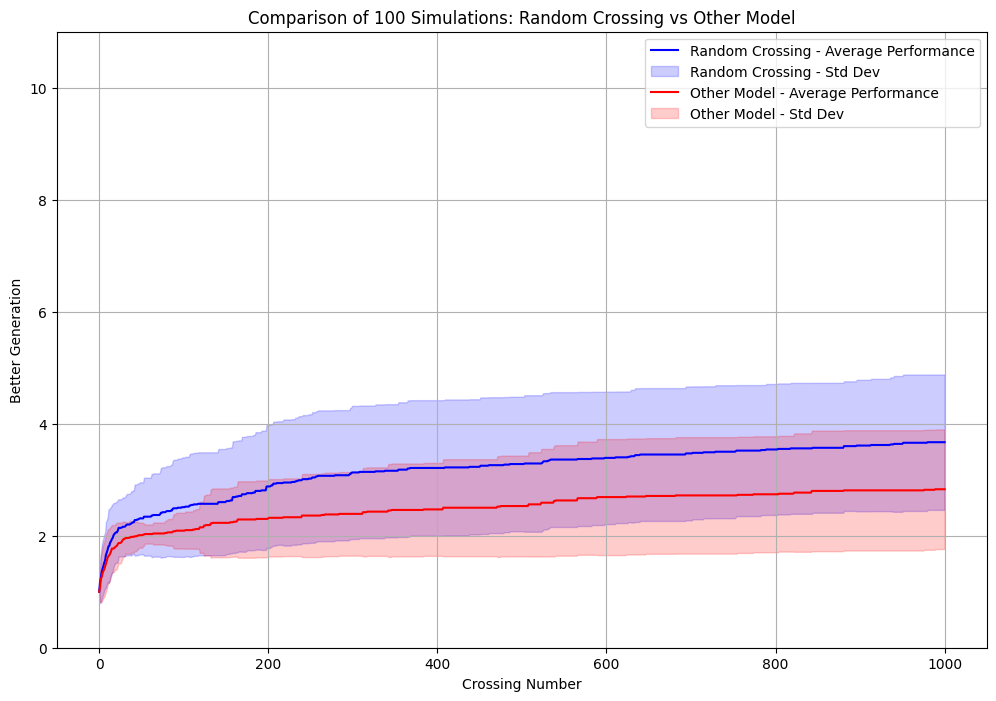

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Convert both to numpy arrays for easy aggregation
simulation_random_array = np.array(list_simulation_random_better)
simulation_other_array = np.array(list_simulation_random)

# Calculate mean and standard deviation across simulations for both models
mean_performance_random = np.mean(simulation_random_array, axis=0)
std_performance_random = np.std(simulation_random_array, axis=0)

mean_performance_other = np.mean(simulation_other_array, axis=0)
std_performance_other = np.std(simulation_other_array, axis=0)

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot for Random Crossing model
plt.plot(mean_performance_random, label='Random Crossing - Average Performance', color='blue')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_random - std_performance_random, 
                 mean_performance_random + std_performance_random, 
                 color='blue', alpha=0.2, label='Random Crossing - Std Dev')

# Plot for Other model
plt.plot(mean_performance_other, label='Other Model - Average Performance', color='red')
plt.fill_between(range(crosing_number + 1), 
                 mean_performance_other - std_performance_other, 
                 mean_performance_other + std_performance_other, 
                 color='red', alpha=0.2, label='Other Model - Std Dev')

# Customize the plot
plt.title('Comparison of 100 Simulations: Random Crossing vs Other Model')
plt.xlabel('Crossing Number')
plt.ylabel('Better Generation')
plt.ylim(0, 11)  # Set y-axis limits from 0 to 11
plt.legend()
plt.grid(True)
plt.show()